In [1]:
import pandas as pd
import pickle
import copy
import matplotlib.pyplot as plt
import numpy as np
from alibi.confidence import TrustScore

In [2]:
train_full = pd.read_csv("./data/base/train-white.csv", sep=",")
test_full = pd.read_csv("./data/base/test-white.csv", sep=",")

In [3]:
target = "quality"
model_name = "rf"

In [4]:
with open('./model/selected-{}.pickle'.format(model_name), 'rb') as f:
    model = pickle.load(f)

In [5]:
X_train = copy.deepcopy(train_full.drop(columns=target))
X_test = copy.deepcopy(test_full.drop(columns=target))
y_train = train_full[target]
y_test = test_full[target]

In [6]:
# preperation_model = copy.deepcopy(model)
# preperation_model.steps.pop(-1)

In [7]:
# X_test_prepared_arr = preperation_model.transform(X_test)
# X_train_prepared_arr = preperation_model.transform(X_train)

In [8]:
# X_test_prepared = pd.DataFrame(X_test_prepared_arr, columns=X_train.columns)
# X_train_prepared = pd.DataFrame(X_train_prepared_arr, columns=X_train.columns)

In [9]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0
1,6.8,0.14,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2
2,6.6,0.24,0.22,12.3,0.051,35.0,146.0,0.99676,3.10,0.67,9.4
3,6.5,0.37,0.30,2.2,0.033,39.0,107.0,0.98894,3.22,0.53,13.5
4,6.9,0.15,0.28,4.4,0.029,14.0,107.0,0.99347,3.24,0.46,10.4


In [10]:
classes = model[model_name].classes_; len(classes)

7

In [11]:
y_train_norm = y_train - 3

In [12]:
y_train_norm.head()

0    3
1    3
2    2
3    4
4    5
Name: quality, dtype: int64

In [13]:
y_test_norm = y_test - 3

In [14]:
ts = TrustScore()
ts.fit(X_train.to_numpy(), y_train_norm.to_numpy(), classes=len(classes))
scores = ts.score(X_test, y_test_norm, k=4)



In [15]:
scores

(array([0.75059755, 1.00738965, 0.84179798, ..., 0.6517553 , 0.95362187,
        0.74440627]),
 array([3, 3, 4, ..., 3, 3, 2], dtype=int64))

In [16]:
my_scores = (scores[0], scores[1][:] + 3)

In [40]:
my_scores

(array([0.75059755, 1.00738965, 0.84179798, ..., 0.6517553 , 0.95362187,
        0.74440627]),
 array([6, 6, 7, ..., 6, 6, 5], dtype=int64))

In [41]:
def detect_and_replace_outliers(arr, threshold):
    inlier_array = []
    outlier_array = []
    mean_val = np.mean(arr)
    std_dev = np.std(arr)
    upper_threshold = mean_val + threshold * std_dev

    for i, val in enumerate(arr):
        if val > upper_threshold:
            outlier_array.append({"index": i, "value": arr[i]})
        else:
            inlier_array.append({"index": i, "value": arr[i]})

    return inlier_array, outlier_array

In [45]:
normal, extremes = detect_and_replace_outliers(my_scores[0].tolist(), 4); extremes

[{'index': 256, 'value': 5484432867753.966},
 {'index': 297, 'value': 5484432867753.966},
 {'index': 528, 'value': 7479123333653.485},
 {'index': 722, 'value': 4776815477124.902},
 {'index': 816, 'value': 5125497550911.5205},
 {'index': 838, 'value': 7544932678321.258},
 {'index': 938, 'value': 5125497550911.5205},
 {'index': 1030, 'value': 6864714508994.528},
 {'index': 1367, 'value': 8168538799785.429},
 {'index': 1421, 'value': 3287786179178.932}]

In [46]:
dist_sum  = 0
conf_sum = 0
for i, score in enumerate(scores[1]):
    print("actual prediction: {}".format(y_test.iloc[i]))
    print("closest class: {}".format(score+3))
    abs_dist = abs(y_test.iloc[i] - (score+3))
    print(abs_dist)
    dist_sum = dist_sum + abs_dist
    conf_sum = conf_sum + scores[0][i]

print(dist_sum / len(scores[1]))
print(conf_sum / len(scores[1]))

actual prediction: 4
closest class: 6
2
actual prediction: 5
closest class: 6
1
actual prediction: 6
closest class: 7
1
actual prediction: 6
closest class: 7
1
actual prediction: 8
closest class: 7
1
actual prediction: 6
closest class: 5
1
actual prediction: 8
closest class: 5
3
actual prediction: 6
closest class: 7
1
actual prediction: 6
closest class: 7
1
actual prediction: 5
closest class: 6
1
actual prediction: 7
closest class: 5
2
actual prediction: 5
closest class: 7
2
actual prediction: 6
closest class: 7
1
actual prediction: 7
closest class: 6
1
actual prediction: 6
closest class: 7
1
actual prediction: 6
closest class: 5
1
actual prediction: 5
closest class: 6
1
actual prediction: 6
closest class: 5
1
actual prediction: 6
closest class: 7
1
actual prediction: 6
closest class: 5
1
actual prediction: 5
closest class: 6
1
actual prediction: 5
closest class: 6
1
actual prediction: 6
closest class: 5
1
actual prediction: 5
closest class: 6
1
actual prediction: 5
closest class: 6
1


In [47]:
y_test.filter(items=[1421,  722,  816,  938,  256,  297, 1030,  528,  838, 1367], axis=0)

1421    8
722     7
816     7
938     7
256     7
297     7
1030    8
528     6
838     7
1367    6
Name: quality, dtype: int64

In [48]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,color
0,6.8,0.67,0.30,13.0,0.290,22.0,193.0,0.99840,3.08,0.67,9.0,blue
1,6.7,0.26,0.26,4.1,0.073,36.0,202.0,0.99560,3.30,0.67,9.5,blue
2,5.7,0.21,0.25,1.1,0.035,26.0,81.0,0.99020,3.31,0.52,11.4,blue
3,6.6,0.16,0.30,1.6,0.034,15.0,78.0,0.99200,3.38,0.44,11.2,blue
4,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.2,blue


In [49]:
def highlight_scatterplot(df, feature, highlight_indexes):
    # Create a new column in the DataFrame for the color
    df['color'] = 'blue'  # default color
    df.loc[highlight_indexes, 'color'] = 'red'  # highlight color

    plt.figure(figsize=(10, 6))

    # Scatterplot
    plt.scatter(df.index, df[feature], color=df['color'])
    plt.title('Scatterplot of Feature with Highlighted Points')
    plt.xlabel('Index')
    plt.ylabel(feature)

    # Remove the color column from the dataframe
    df = df.drop('color', axis=1)

    plt.show()

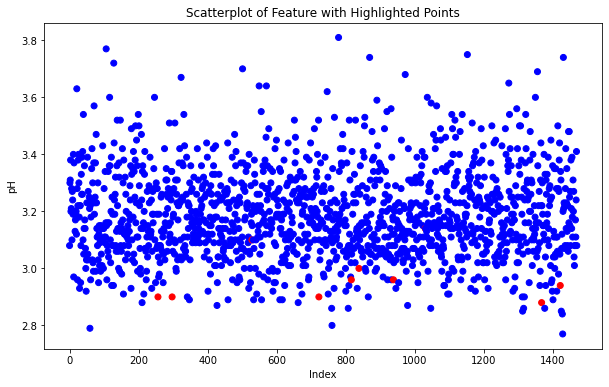

In [50]:
highlight_scatterplot(X_test, 'pH', [1421,  722,  816,  938,  256,  297, 1030,  528,  838, 1367])

In [51]:
trustscores_loc = './data/trust_scores/scores-{}.npy'.format(model_name)
np.save(trustscores_loc, my_scores)

In [52]:
my_scores[0]

array([0.75059755, 1.00738965, 0.84179798, ..., 0.6517553 , 0.95362187,
       0.74440627])

In [53]:
from pymongo import MongoClient

In [54]:
# Create a MongoClient to the running mongod instance
client = MongoClient("localhost", 27017)

# Get a reference to a particular database
db = client["pipeline"]
model_collection = db["model"]
trustscore_meta_collection = db["trustscore_meta"]
trustscore_collection = db["trustscore"]

stage = "selection"
model_name = model_name

In [55]:
model_id = model_collection.find_one(
            {"stage": stage, "model_name": model_name}
        )["_id"]

In [59]:
normal_values = np.array([item['value'] for item in normal])
trustscore_meta_collection.insert_one(
    {
        "model_id": model_id,
        "statistics": {
            "length": len(my_scores[0]),
            "mean": normal_values.mean(),
            "std": normal_values.std(),
            "median": np.median(normal_values),
            "min": normal_values.min(),
            "max": normal_values.max(),
            "outliers": len(extremes)
        }
    }
)

In [60]:
trustscores_meta_id = trustscore_meta_collection.find_one(
            {"model_id": model_id}
        )["_id"]

In [62]:
for elem in normal:
    value = elem["value"]
    index = elem["index"]
    trustscore_collection.insert_one(
        {
            "trustscores_meta_id": trustscores_meta_id,
            "extreme": False,
            "index": index,
            "score": value,
            "neighbour": int(my_scores[1][index]),
        }
    )
for elem in extremes:
    value = elem["value"]
    index = elem["index"]
    trustscore_collection.insert_one(
        {
            "trustscores_meta_id": trustscores_meta_id,
            "extreme": True,
            "index": index,
            "score": value,
            "neighbour": int(my_scores[1][index]),
        }
    )